In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
users_path = '/Users/mehulchopra/Documents/personal/training/data-analysis-data/movielens/users.dat'
users = pd.read_csv(users_path, delimiter='::', header=None, names=['user_id','gender','age','occup','pincode'])
users

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,gender,age,occup,pincode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [3]:
movies_path = '/Users/mehulchopra/Documents/personal/training/data-analysis-data/movielens/movies.dat'
movies = pd.read_csv(movies_path, delimiter='::', header=None, names=['movie_id', 'title', 'genres'])
movies

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
ratings_path = '/Users/mehulchopra/Documents/personal/training/data-analysis-data/movielens/ratings.dat'
ratings = pd.read_csv(ratings_path, delimiter='::', header=None, names=['user_id','movie_id','ratings','timestamp'])
ratings

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
d1 = pd.merge(pd.merge(ratings, movies), users)
d1

,user_id,movie_id,ratings,timestamp,title,genres,gender,age,occup,pincode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [7]:
# to get the movie titles of only the popular films
# popular films are those that have got more than 600 people voting for them
d2 = d1['title']
d2

0          One Flew Over the Cuckoo's Nest (1975)
1                James and the Giant Peach (1996)
2                             My Fair Lady (1964)
3                          Erin Brockovich (2000)
4                            Bug's Life, A (1998)
                            ...                  
1000204                          Footloose (1984)
1000205                    MacKenna's Gold (1969)
1000206                        Pumpkinhead (1988)
1000207                  Missing in Action (1984)
1000208                       Bronco Billy (1980)
Name: title, Length: 1000209, dtype: object

In [9]:
d3 = d2.value_counts()
d3

American Beauty (1999)                                                   3428
Star Wars: Episode IV - A New Hope (1977)                                2991
Star Wars: Episode V - The Empire Strikes Back (1980)                    2990
Star Wars: Episode VI - Return of the Jedi (1983)                        2883
Jurassic Park (1993)                                                     2672
                                                                         ... 
Last of the High Kings, The (a.k.a. Summer Fling) (1996)                    1
Open Season (1996)                                                          1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)       1
Ten Benny (1997)                                                            1
Aiqing wansui (1994)                                                        1
Name: title, Length: 3706, dtype: int64

In [11]:
d4 = d3[d3 > 600]
d4

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Opposite of Sex, The (1998)                               608
Piano, The (1993)                                         608
Batman & Robin (1997)                                     606
Strange Days (1995)                                       605
Whole Nine Yards, The (2000)                              602
Name: title, Length: 499, dtype: int64

In [12]:
popular_films = d4.index
popular_films

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Star Trek V: The Final Frontier (1989)', 'Scary Movie (2000)',
       'Civil Action, A (1998)', 'Dragonheart (1996)',
       'Adventures of Buckaroo Bonzai Across the 8th Dimension, The (1984)',
       'Opposite of Sex, The (1998)', 'Piano, The (1993)',
       'Batman & Robin (1997)', 'Strange Days (1995)',
       'Whole Nine Yards, The (2000)'],
      dtype='object', length=499)

In [14]:
# get the average ratings by gender for each of the popular films
d5 = d1[['title','gender','ratings']]
d5

,title,gender,ratings
0,One Flew Over the Cuckoo's Nest (1975),F,5
1,James and the Giant Peach (1996),F,3
2,My Fair Lady (1964),F,3
3,Erin Brockovich (2000),F,4
4,"Bug's Life, A (1998)",F,5
...,...,...,...
1000204,Footloose (1984),M,2
1000205,MacKenna's Gold (1969),M,3
1000206,Pumpkinhead (1988),M,4
1000207,Missing in Action (1984),M,2


In [15]:
d6 = d5.pivot_table('ratings', aggfunc='mean', index='title', columns=['gender'])
d6

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [16]:
d7 = d6.loc[popular_films]
d7

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Opposite of Sex, The (1998)",3.747368,3.667464
"Piano, The (1993)",3.878661,3.542005
Batman & Robin (1997),2.529915,2.192229
Strange Days (1995),3.125000,3.321905


In [17]:
loved_females = d7.sort_values(by='F', ascending=False)
loved_females

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
...,...,...
"Lawnmower Man, The (1992)",2.558140,2.676749
Batman & Robin (1997),2.529915,2.192229
Mission to Mars (2000),2.522059,2.610350
Lost in Space (1998),2.436364,2.614004


In [18]:
loved_males = d7.sort_values(by='M', ascending=False)
loved_males

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
...,...,...
Lost in Space (1998),2.436364,2.614004
Mission to Mars (2000),2.522059,2.610350
Batman Forever (1995),2.901235,2.573984
Batman & Robin (1997),2.529915,2.192229


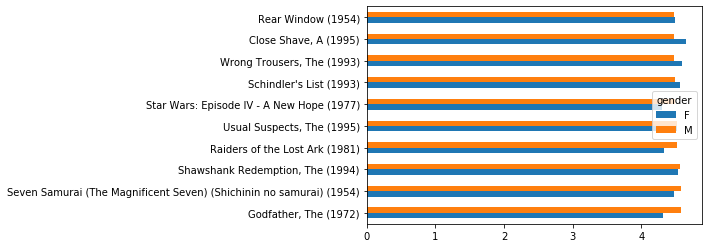

In [20]:
top_10 = loved_males.head(10)
top_10.plot(kind='barh')
plt.show()

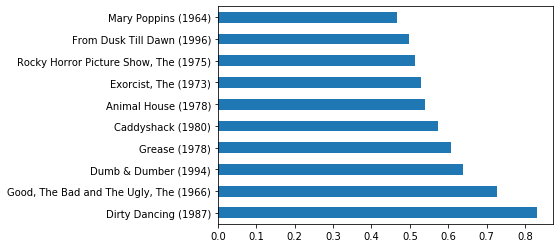

In [27]:
d7['diff'] = d7['F'] - d7['M']
d7['diff'] = d7['diff'].abs()
d20 = d7.sort_values(by='diff', ascending=False)
top_10 = d20.head(10)
p_top_10 = top_10['diff']
p_top_10.plot(kind='barh')
plt.show()